# Lead Coversion for X Education online courses
with 37 predictor variables we need to predict whether the enquiry for the courses from various sources with additional parameters like education,specalization,demographics,index and score etc.will convert into lead to fulfill business objective.

### Importing and Meargaing Data

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [2]:
data = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/Leads.csv")

In [3]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Check the dimesions and other parameters 

In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Check the missing values, null values and handle them for each applicable variables.

In [6]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
data['Country'].value_counts()/9240*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
Germany                  0.043290
South Africa             0.043290
Canada                   0.043290
Kuwait                   0.043290
Sweden                   0.032468
China                    0.021645
Ghana                    0.021645
Belgium                  0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Netherlands              0.021645
Malaysia                 0.010823
Liberia       

In [8]:
data = data.drop('Country',1)

In [9]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [10]:
data['Specialization'].value_counts()/9240*100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [11]:
data.replace({'Select': np.nan}, inplace = True)

In [12]:
data['City'].value_counts()/9240*100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [13]:
data.isnull().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [14]:
data = data.drop(['How did you hear about X Education','Lead Profile'],1)

In [15]:
data.isnull().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [16]:
data['Specialization'].value_counts()/9240*100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [17]:
data['Specialization'] = data['Specialization'].replace('nan', np.nan).fillna('Finance Management')

In [18]:
data['Specialization'].value_counts()/9240*100

Finance Management                   47.142857
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [19]:
data['What is your current occupation'].value_counts()/9240*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [20]:
data = data.drop('What is your current occupation',1)

In [21]:
data.isnull().sum()/9240*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                    0.000000
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [22]:
data['What matters most to you in choosing a course'].value_counts()/9240*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
data = data.drop('What matters most to you in choosing a course',1)

In [24]:
data.isnull().sum()/9240*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [25]:
data['Tags'].value_counts()/9240*100

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [26]:
data['Tags'] = data['Tags'].replace('nan', np.nan).fillna('Will revert after reading the email')

In [27]:
data['Tags'].value_counts()/9240*100

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

### Checking the impact of each identified variable using Statistics

In [28]:
data['Lead Quality'].value_counts()/9240*100

Might be             16.883117
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

In [29]:
data['Lead Quality'] = data['Lead Quality'].replace('nan', np.nan).fillna('Might be')

In [30]:
data['Lead Quality'].value_counts()/9240*100

Might be             68.474026
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

In [31]:
data = data.drop('Lead Quality',1)

In [32]:
data['City'] = data['City'].replace('nan', np.nan).fillna('Unknown')

In [33]:
data.isnull().sum()/9240*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [34]:
data['Asymmetrique Activity Index'].value_counts()/9240*100

02.Medium    41.547619
01.High       8.885281
03.Low        3.917749
Name: Asymmetrique Activity Index, dtype: float64

In [35]:
data['Asymmetrique Activity Index'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [36]:
data['Asymmetrique Activity Index'].value_counts()/9240*100

02    41.547619
01     8.885281
03     3.917749
Name: Asymmetrique Activity Index, dtype: float64

In [37]:
data.loc[pd.isnull(data['Asymmetrique Activity Index']), ['Asymmetrique Activity Index']] = '02'

In [38]:
data['Asymmetrique Profile Index'].value_counts()/9240*100

02.Medium    30.173160
01.High      23.841991
03.Low        0.335498
Name: Asymmetrique Profile Index, dtype: float64

In [39]:
data['Asymmetrique Profile Index'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [40]:
data['Asymmetrique Profile Index'].value_counts()/9240*100

02    30.173160
01    23.841991
03     0.335498
Name: Asymmetrique Profile Index, dtype: float64

In [41]:
data.isnull().sum()/9240*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                               0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Last Activity                               9137 non-null object
Specialization                              9240 non-null object
Search                                      9240 non-null object
Magazine                                    9240 

In [43]:
data.loc[pd.isnull(data['Asymmetrique Profile Index']), ['Asymmetrique Profile Index']] = '02'

In [44]:
data['Asymmetrique Profile Index'].value_counts()/9240*100

02    75.822511
01    23.841991
03     0.335498
Name: Asymmetrique Profile Index, dtype: float64

In [45]:
data.loc[np.isnan(data['Asymmetrique Activity Score']), ['Asymmetrique Activity Score']] = data['Asymmetrique Activity Score'].mean()
data.loc[np.isnan(data['Asymmetrique Profile Score']), ['Asymmetrique Profile Score']] = data['Asymmetrique Profile Score'].mean()

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [46]:
data['Last Activity'].value_counts()/9240*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [47]:
data.loc[pd.isnull(data['Last Activity']), ['Last Activity']] = 'Email Opened'

In [48]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [49]:
data.loc[pd.isnull(data['Page Views Per Visit']), ['Page Views Per Visit']] = data['Page Views Per Visit'].mean()

In [50]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [51]:
data.loc[pd.isnull(data['TotalVisits']), ['TotalVisits']] = data['TotalVisits'].mean()

In [52]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [53]:
data['Lead Source'].value_counts()/9240*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Social Media          0.021645
Press_Release         0.021645
welearnblog_Home      0.010823
testone               0.010823
blog                  0.010823
youtubechannel        0.010823
WeLearn               0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [54]:
data.loc[pd.isnull(data['Lead Source']), ['Lead Source']] = 'Google'

In [55]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [56]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Update me on Supply Chain Content Get updates on DM Content     City  \
0                                No                        No  Unknown   
1                                No                        No  Unknown   
2                                No                        No   Mumbai   
3                                No                        No   Mumbai   
4                                No                        No   Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                          02                         02   
1                          02                         02   
2                          02                         01   
3                          02                         01   
4                          02                         01   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 31 columns]

### Converting categorical to contineous and continuing with statistical analysis

In [57]:
data.replace({'Yes': 1, 'No':0}, inplace = True)

In [58]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Do Not Email                                9240 non-null int64
Do Not Call                                 9240 non-null int64
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Specialization                              9240 non-null object
Search                                      9240 non-null int64
Magazine                                    9240 non

In [59]:
data['Lead Source'].value_counts()/9240*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Social Media          0.021645
Press_Release         0.021645
welearnblog_Home      0.010823
testone               0.010823
blog                  0.010823
youtubechannel        0.010823
WeLearn               0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [60]:
data['Lead Origin'].value_counts()/9240*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [61]:
data['Do Not Call'].value_counts()/9240*100

0    99.978355
1     0.021645
Name: Do Not Call, dtype: float64

In [62]:
data['Do Not Email'].value_counts()/9240*100

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

In [63]:
data = data.drop('Do Not Call',1)

In [64]:
data = data.drop('Do Not Email',1)

In [65]:
data['Last Activity'].value_counts()/9240*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Specialization                              9240 non-null object
Search                                      9240 non-null int64
Magazine                                    9240 non-null int64
Newspaper Article                           9240 non-null int64
X Education Forums                          9240 non

In [67]:
data['Magazine'].value_counts()/9240*100

0    100.0
Name: Magazine, dtype: float64

In [68]:
data = data.drop('Magazine',1)

In [69]:
data['Search'].value_counts()/9240*100

0    99.848485
1     0.151515
Name: Search, dtype: float64

In [70]:
data = data.drop('Search',1)

In [71]:
data['Newspaper Article'].value_counts()/9240*100

0    99.978355
1     0.021645
Name: Newspaper Article, dtype: float64

In [72]:
data = data.drop('Newspaper Article',1)

In [73]:
data['X Education Forums'].value_counts()/9240*100

0    99.989177
1     0.010823
Name: X Education Forums, dtype: float64

In [74]:
data = data.drop('X Education Forums',1)

In [75]:
data['Newspaper'].value_counts()/9240*100

0    99.989177
1     0.010823
Name: Newspaper, dtype: float64

In [76]:
data = data.drop('Newspaper',1)

In [77]:
data['Digital Advertisement'].value_counts()/9240*100

0    99.95671
1     0.04329
Name: Digital Advertisement, dtype: float64

In [78]:
data = data.drop('Digital Advertisement',1)

In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Specialization                              9240 non-null object
Through Recommendations                     9240 non-null int64
Receive More Updates About Our Courses      9240 non-null int64
Tags                                        9240 non-null object
Update me on Supply Chain Content           9240 no

In [80]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
City                                        0.0
Asymmetrique Activity Index                 0.0
Asymmetrique Profile Index                  0.0
Asymmetrique Activity Score                 0.0
Asymmetrique Profile Score                  0.0
I agree to pay the amount through cheque

In [81]:
data['Specialization'].value_counts()/9240*100

Finance Management                   47.142857
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [82]:
data['Through Recommendations'].value_counts()/9240*100

0    99.924242
1     0.075758
Name: Through Recommendations, dtype: float64

In [83]:
data = data.drop('Through Recommendations',1)

In [84]:
data['Receive More Updates About Our Courses'].value_counts()/9240*100

0    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [85]:
data = data.drop('Receive More Updates About Our Courses',1)

In [86]:
data['Tags'].value_counts()/9240*100

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [87]:
data['Update me on Supply Chain Content'].value_counts()/9240*100

0    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [88]:
data = data.drop('Update me on Supply Chain Content',1)

In [89]:
data['Get updates on DM Content'].value_counts()/9240*100

0    100.0
Name: Get updates on DM Content, dtype: float64

In [90]:
data = data.drop('Get updates on DM Content',1)

In [91]:
data['I agree to pay the amount through cheque'].value_counts()/9240*100

0    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [92]:
data = data.drop('I agree to pay the amount through cheque',1)

In [93]:
data['A free copy of Mastering The Interview'].value_counts()/9240*100

0    68.744589
1    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
Tags                                      9240 non-null object
City                                      9240 non-null object
Asymmetrique Activity Index               9240 non-null object
Asymmetrique Profile Index                9240 non-null object
Asymmetrique

### Initiating the dummy varaibels, concatinate the data frame to original data set and then dropping original variables.

In [95]:
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags', 'City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 121 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(4), object(10), uint8(103)
memory usage: 2.2+ MB


In [97]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags', 'City','Last Notable Activity'],1)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 114 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(4), object(3), uint8(103)
memory usage: 1.7+ MB


In [99]:
data.shape

(9240, 114)

In [100]:
data.set_index('Prospect ID')

Lead Number  Converted  TotalVisits  \
Prospect ID                                                                 
7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          1          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          0          1.0   
3256f628-e534-4826-9d63-4a8b88782852       660681          1          2.0   
2058ef08-2858-443e-a01f-a9237db2f5ce       660680          0          0.0   
9fae7df4-169d-489b-afe4-0f3d752542ed       660673          1          2.0   
20ef72a2-fb3b-45e0-924e-551c5fa59095       660664          0          0.0   
cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624          0          2.0   
af465dfc-7204-4130-9e05-33231863c4b5       660616          0          4.0   
2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608          1          8.0   
9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570          1          8.0   
8bf76a52-2478-476b-8618-1688e07874ad       660562          1         11.0   
88867067-3750-4753-8d33-1c7d1db53b5e       660558          0          5.0   
a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553          0          1.0   
25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547          1          6.0   
3abb7c77-1634-4083-9a9f-861068220611       660540          0          0.0   
e5c3beca-a0b6-4b3f-8c01-0919fb9ca3f2       660534          0          6.0   
82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c       660522          1          6.0   
4512c16a-e96a-4459-b9ec-c7d8fe8c4880       660509          0          3.0   
c4419c99-b002-408b-a6fd-fa100716592c       660479          0          1.0   
fd71ab5b-53b8-4105-9960-efedc44962fa       660478          0          4.0   
8fd38b83-5c32-4277-bcfb-499f34a01c56       660471          1          1.0   
ecbc6e69-29a9-44bf-804a-13079ef301bc       660461          0          4.0   
ecd117ca-375f-49ea-afd6-b52b84d00c69       660458          1          6.0   
31c326f0-4a9b-43a6-9006-99d3830fbcae       660447          1          3.0   
c494aca4-8c8e-4081-9784-41eb6346015e       660432          1          4.0   
6d143c0e-abae-425f-a2c0-52c2946cbd45       660424          1          6.0   
8247051c-f838-4a41-b39c-1f0b44c3d5e6       660423          0          5.0   
b3455e2e-8236-478a-b1aa-666ad3381722       660410          1          3.0   
...                                           ...        ...          ...   
14ac6418-af18-4acd-b464-02f6e0fefa1c       579833          1          4.0   
8458b410-48fe-4bcd-aecf-5813b6006ee2       579832          1          4.0   
0c15052a-9f8a-47c4-9fc3-eb20c84ffd74       579830          0          5.0   
d4587acb-02d1-4c5e-9110-6032d829bac1       579822          0          5.0   
479a8b1c-d410-4220-a24f-854a376be43d       579808          1          2.0   
06334ac1-64a8-444c-92a7-117dcd26dea5       579802          0          8.0   
6da5be9f-3f34-4dc7-9e30-7c26d030372e       579799          0          6.0   
b8872c12-7534-498d-8f4a-e79a19516db1       579786          0          0.0   
eee466be-b98c-4126-9220-fc406093b9ce       579784          0          1.0   
9c970d5c-2748-4f61-90a6-eafd9ad5a242       579778          1          6.0   
679ab5f9-0f85-4f16-a903-821ecd82e731       579769          0          5.0   
b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767          0          4.0   
68e53bdc-b66d-48ef-8592-973a8a65377e       579764          0          6.0   
c55de92b-9295-40e1-90e8-a628c349c292       579755          0          7.0   
18930f11-41cd-42d1-96d7-34ac870174cb       579753          0          4.0   
787ab5f4-6f09-41c0-b083-55521ca23f8a       579744          0          2.0   
c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735          0          0.0   
ac95586a-506a-4222-9967-17dfe9f82524       579728          1          5.0   
40d3b3cf-d939-49ff-bea5-60e8d4025104       579717          1          4.0   
5cfdd915-d5a0-4976-b38d-e5f72ec555

In [101]:
# Converting in Numeric 
data = data.convert_objects(convert_numeric=True)

C:\PY\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 114 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(6), object(1), uint8(103)
memory usage: 1.7+ MB


### Checking outlier treatment for identified variables.

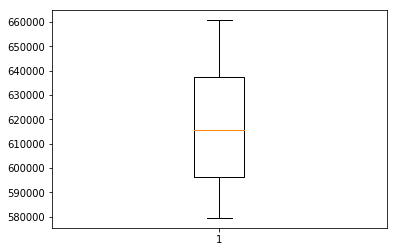

In [103]:
plt.boxplot(data['Lead Number'])
Q1 = data['Lead Number'].quantile(0.05)
Q3 = data['Lead Number'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Lead Number'] >= Q1) & (data['Lead Number'] <= Q3)]

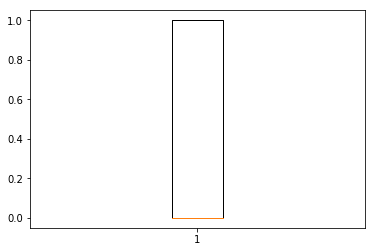

In [104]:
plt.boxplot(data['Converted'])
Q1 = data['Converted'].quantile(0.05)
Q3 = data['Converted'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Converted'] >= Q1) & (data['Converted'] <= Q3)]

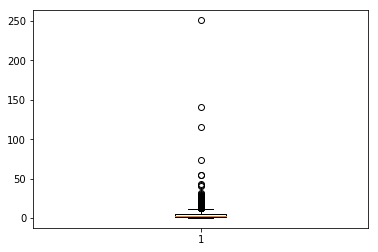

In [105]:
plt.boxplot(data['TotalVisits'])
Q1 = data['TotalVisits'].quantile(0.05)
Q3 = data['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['TotalVisits'] >= Q1) & (data['TotalVisits'] <= Q3)]

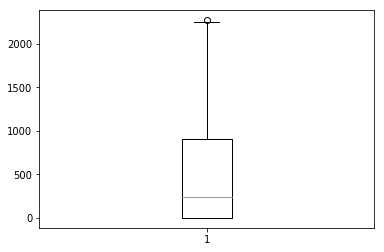

In [106]:
plt.boxplot(data['Total Time Spent on Website'])
Q1 = data['Total Time Spent on Website'].quantile(0.05)
Q3 = data['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Total Time Spent on Website'] >= Q1) & (data['Total Time Spent on Website'] <= Q3)]

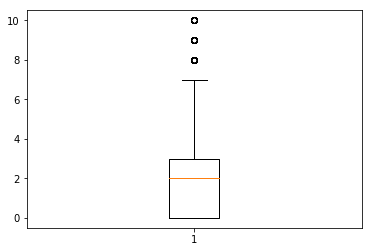

In [107]:
plt.boxplot(data['Page Views Per Visit'])
Q1 = data['Page Views Per Visit'].quantile(0.05)
Q3 = data['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Page Views Per Visit'] >= Q1) & (data['Page Views Per Visit'] <= Q3)]

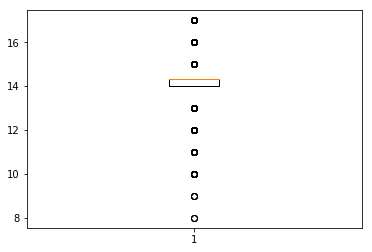

In [108]:
plt.boxplot(data['Asymmetrique Activity Score'])
Q1 = data['Asymmetrique Activity Score'].quantile(0.05)
Q3 = data['Asymmetrique Activity Score'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Asymmetrique Activity Score'] >= Q1) & (data['Asymmetrique Activity Score'] <= Q3)]

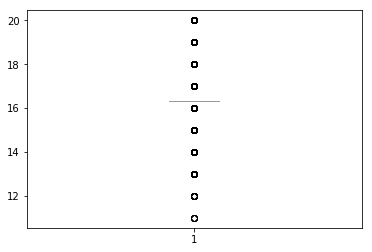

In [109]:
plt.boxplot(data['Asymmetrique Profile Score'])
Q1 = data['Asymmetrique Profile Score'].quantile(0.05)
Q3 = data['Asymmetrique Profile Score'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['Asymmetrique Profile Score'] >= Q1) & (data['Asymmetrique Profile Score'] <= Q3)]

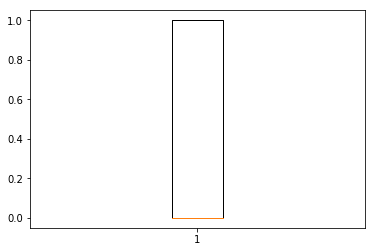

In [110]:
plt.boxplot(data['A free copy of Mastering The Interview'])
Q1 = data['A free copy of Mastering The Interview'].quantile(0.05)
Q3 = data['A free copy of Mastering The Interview'].quantile(0.95)
IQR = Q3 - Q1
data = data[(data['A free copy of Mastering The Interview'] >= Q1) & (data['A free copy of Mastering The Interview'] <= Q3)]

In [111]:
data.shape

(6255, 114)

### Feature Standardization

In [112]:
X = data.drop(['Converted','Prospect ID'], axis=1)

X.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
462       655404          4.0                          365   
463       655403          2.0                          102   
466       655375          3.0                          267   
467       655371          7.0                          238   
468       655366          2.0                          170   

     Page Views Per Visit  Asymmetrique Activity Index  \
462                  2.00                            2   
463                  2.00                            2   
466                  3.00                            2   
467                  1.75                            2   
468                  1.00                            2   

     Asymmetrique Profile Index  Asymmetrique Activity Score  \
462                           1                         13.0   
463                           2                         13.0   
466                           1                         15.0   
467                           1                         13.0   
468                           2                         15.0   

     Asymmetrique Profile Score  A free copy of Mastering The Interview  \
462                        17.0                                       1   
463                        15.0                                       0   
466                        17.0                                       0   
467                        18.0                                       0   
468                        15.0                                       0   

     Lead Origin_Landing Page Submission  \
462                                    1   
463                                    0   
466                                    1   
467                                    1   
468                                    0   

                            ...                          \
462                         ...                           
463                         ...                           
466                         ...                           
467                         ...                           
468                         ...                           

     Last Notable Activity_Form Submitted on Website  \
462                                                0   
463                                                0   
466                                                0   
467                                                0   
468                                                0   

     Last Notable Activity_Had a Phone Conversation  \
462                                               0   
463                                               0   
466                                               0   
467                                               0   
468                                               0   

     Last Notable Activity_Modified  \
462                               0   
463                               0   
466                               1   
467                               1   
468                               1   

     Last Notable Activity_Olark Chat Conversation  \
462                                              0   
463                                              0   
466                                              0   
467                                              0   
468                                              0   

     Last Notable Activity_Page Visited on Website  \
462                                              0   
463                                              0   
466                                              0   
467                                              0   
468                                              0   

     Last Notable Activity_Resubscribed to emails  \
462                                             0   
463                                             0   
466                                             0   
467                                             0   
468      

In [113]:
y = data['Converted']

y.head()

462    0
463    0
466    1
467    0
468    0
Name: Converted, dtype: int64

In [114]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [115]:
scaler = StandardScaler()

X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score','A free copy of Mastering The Interview']] = scaler.fit_transform(X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score','A free copy of Mastering The Interview']])

X_train.head()

C:\PY\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\PY\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Lead Number  TotalVisits  Total Time Spent on Website  \
3575     0.500064    -1.182131                    -0.862324   
6887    -1.019857    -1.182131                    -0.862324   
834      1.807156     0.154083                     1.646433   
8221    -1.515120    -1.182131                    -0.862324   
7021    -1.070104    -1.182131                    -0.862324   

      Page Views Per Visit  Asymmetrique Activity Index  \
3575             -1.244253                            2   
6887             -1.244253                            2   
834               0.595041                            2   
8221             -1.244253                            1   
7021             -1.244253                            2   

      Asymmetrique Profile Index  Asymmetrique Activity Score  \
3575                           2                    -0.002298   
6887                           2                    -0.002298   
834                            1                    -2.284824   
8221                           2                     2.957330   
7021                           2                    -0.002298   

      Asymmetrique Profile Score  A free copy of Mastering The Interview  \
3575                    0.031155                               -0.651664   
6887                    0.031155                               -0.651664   
834                     2.121627                               -0.651664   
8221                   -1.667480                               -0.651664   
7021                    0.031155                               -0.651664   

      Lead Origin_Landing Page Submission  \
3575                                    0   
6887                                    0   
834                                     1   
8221                                    0   
7021                                    0   

                             ...                          \
3575                         ...                           
6887                         ...                           
834                          ...                           
8221                         ...                           
7021                         ...                           

      Last Notable Activity_Form Submitted on Website  \
3575                                                0   
6887                                                0   
834                                                 0   
8221                                                0   
7021                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3575                                               0   
6887                                               0   
834                                                0   
8221                                               0   
7021                                               0   

      Last Notable Activity_Modified  \
3575                               0   
6887                               0   
834                                1   
8221                               0   
7021                               0   

      Last Notable Activity_Olark Chat Conversation  \
3575                                              0   
6887                                              0   
834                                               0   
8221                                              0   
7021                                              1   

      Last Notable Activity_Page Visited on Website  \
3575                                              0   
6887                                              0   
834                                               0   
8221                                              0   
7021                                              0   

      Last Notable Activity_Resubscribed to emails  \
3575                                             0   
6887                                             0   
834                                            

In [116]:
lead = (sum(data['Lead Number'])/len(data['Lead Number'].index))*100
lead

61646590.423661076

### Checking the Correlation matrix 

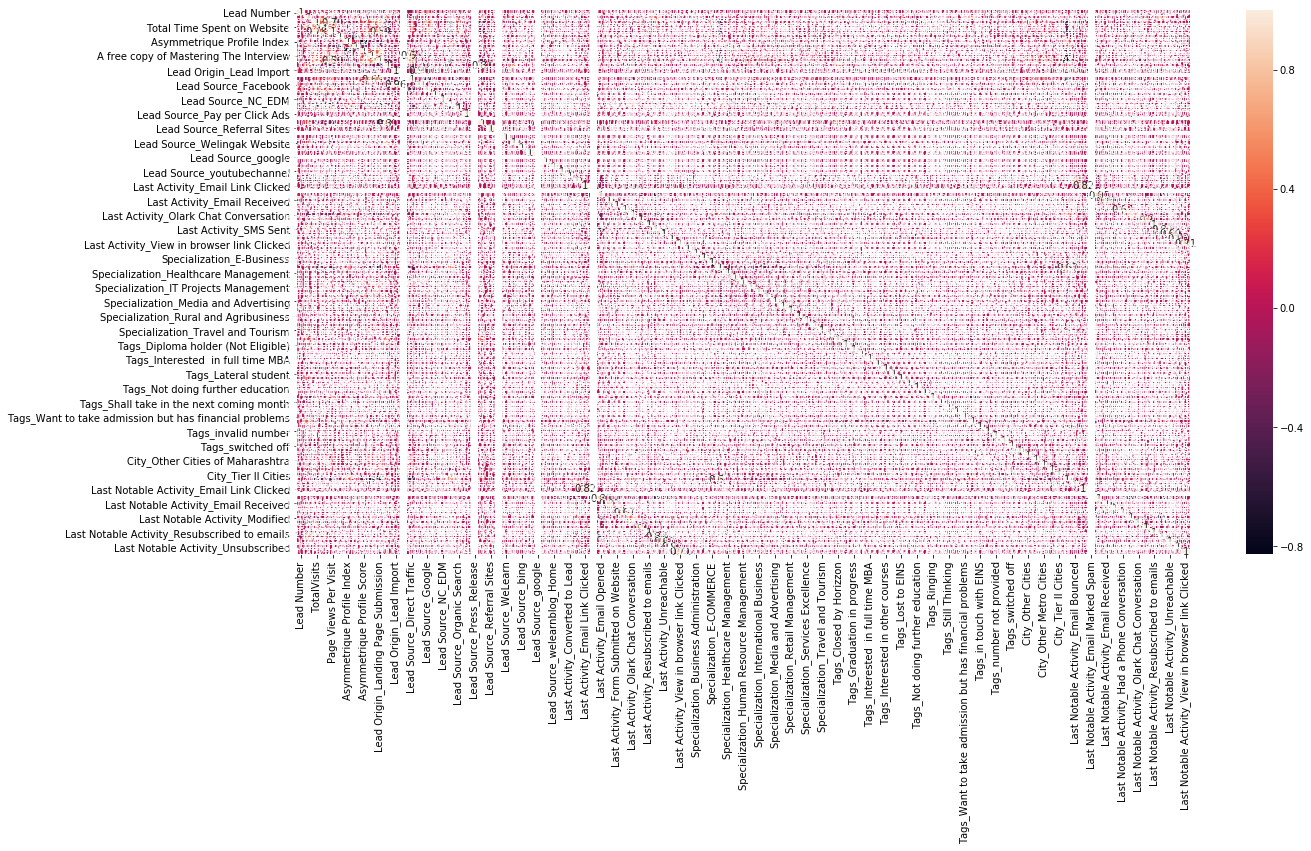

In [126]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

## Model Building

In [127]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\PY\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4378
Model:                            GLM   Df Residuals:                     4276
Model Family:                Binomial   Df Model:                          101
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1061.5
Date:                Sat, 24 Aug 2019   Deviance:                       2122.9
Time:                        16:23:30   Pearson chi2:                 7.99e+03
No. Iterations:                    24                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     34.7239   2.13e+05      0.000      1.000   -4.17e+05    4.17e+05
Lead Number                                                0.1588      0.060      2.657      0.008       0.042       0.276
TotalVisits                                                0.1765      0.094      1.880      0.060      -0.008       0.361
Total Time Spent on Website                                1.0752      0.067     15.971      0.000       0.943       1.207
Page Views Per Visit                                      -0.1930      0.104     -1.864      0.062      -0.396       0.010
Asymmetrique Activity Index                                3.0270      0.378      8.016      0.000       2.287       3.767
Asymmetrique Profile Index                                -1.3368      0.260     -5.143      0.000      -1.846      -0.827
Asymmetrique Activity Score                                1.0790      0.095     11.374      0.000       0.893       1.265
Asymmetrique Profile Score                                -0.2747      0.099     -2.771      0.006      -0.469      -0.080
A free copy of Mastering The Interview                    -0.2403      0.092     -2.622      0.009      -0.420      -0.061
Lead Origin_Landing Page Submission                       -1.9078      0.272     -7.011      0.000      -2.441      -1.374
Lead Origin_Lead Add Form                                  3.3931      0.809      4.193      0.000       1.807       4.979
Lead Origin_Lead Import                                   23.6134   3.89e+04      0.001      1.000   -7.63e+04    7.64e+04
Lead Origin_Quick Add Form                              2.006e-08      0.000      0.000      1.000      -0.000       0.000
Lead Source_Direct Traffic                               -22.2666   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                     -44.8849   2.19e+05     -0.000      1.000    -4.3e+05     4.3e+05
Lead Source_Google                                       -22.7170   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Live Chat                                     -2.5514   3.05e+05  -8.35e-06      1.000   -5.99e+05    5.99e+05
Lead Source_NC_EDM                                         1.9465   3.05e+05   6.37e-06      1.000   -5.99e+05    5.99e+05
Lead Source_Olark Chat                                   -21.7940   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                               -22.7214   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Pay per Click Ads                            -42.8440   3.05e+05     -0.000      1.000   -5.99e+05    5.99e+05
Lead Source_Press_Release                               3.931e-08      0.000   9.11e-05

### Feature Selection Using RFE

In [145]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [146]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 62),
 ('TotalVisits', False, 64),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 63),
 ('Asymmetrique Activity Index', False, 11),
 ('Asymmetrique Profile Index', False, 10),
 ('Asymmetrique Activity Score', False, 12),
 ('Asymmetrique Profile Score', False, 43),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', False, 92),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 85),
 ('Lead Source_NC_EDM', False, 69),
 ('Lead Source_Olark Chat', False, 83),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 82),
 ('Lead Source_Press_Release', False, 98),
 ('Lead Source_Reference', False, 40),
 ('Lead Source_Referral Sites', False, 21),


In [148]:
col = X_train.columns[rfe.support_]

In [149]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Mar

### Assessing the model with StatsModels

In [150]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4378
Model:                            GLM   Df Residuals:                     4362
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1398.3
Date:                Sat, 24 Aug 2019   Deviance:                       2796.7
Time:                        17:37:48   Pearson chi2:                 7.95e+03
No. Iterations:                     8                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0260      0.288     -7.031      0.000      -2.591      -1.461
Lead Origin_Landing Page Submission         -1.9208      0.185    -10.395      0.000      -2.283      -1.559
Lead Origin_Lead Add Form                    1.9532      0.314      6.217      0.000       1.337       2.569
Lead Source_Welingak Website                 2.2703      1.066      2.129      0.033       0.180       4.360
Last Activity_Email Bounced                 -1.4313      0.332     -4.318      0.000      -2.081      -0.782
Last Activity_Had a Phone Conversation       2.1909      1.073      2.041      0.041       0.087       4.295
Last Activity_Olark Chat Conversation       -1.5860      0.236     -6.733      0.000      -2.048      -1.124
Tags_Busy                                    2.9233      0.362      8.069      0.000       2.213       3.633
Tags_Closed by Horizzon                      7.6182      0.766      9.945      0.000       6.117       9.120
Tags_Lost to EINS                            8.7007      1.066      8.160      0.000       6.611      10.791
Tags_Ringing                                -1.5157      0.361     -4.204      0.000      -2.222      -0.809
Tags_Will revert after reading the email     3.1719      0.254     12.474      0.000       2.674       3.670
Tags_invalid number                         -1.4680      1.064     -1.380      0.168      -3.553       0.617
Tags_switched off                           -2.0744      0.772     -2.688      0.007      -3.587      -0.562
City_Unknown                                -1.9925      0.185    -10.788      0.000      -2.354      -1.630
Last Notable Activity_SMS Sent               2.7693      0.124     22.312      0.000       2.526       3.013
============================================================================================================
"""

### Getting the predicted values on the train set

In [151]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3575    0.997181
6887    0.872457
834     0.315438
8221    0.300170
7021    0.981421
6589    0.018951
2915    0.300170
3257    0.315438
5803    0.979688
2906    0.003934
dtype: float64

In [152]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99718091, 0.8724569 , 0.31543817, 0.3001696 , 0.98142149,
       0.01895118, 0.3001696 , 0.31543817, 0.9796884 , 0.00393421])

### Creating a dataframe with the actual Lead flag and the predicted probabilities

In [153]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID
0     1   0.997181         3575
1     1   0.872457         6887
2     0   0.315438          834
3     0   0.300170         8221
4     1   0.981421         7021

### Creating new column 'lead' with 1 if lead > 0.5 else 0

In [154]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.997181         3575          1
1     1   0.872457         6887          1
2     0   0.315438          834          0
3     0   0.300170         8221          0
4     1   0.981421         7021          1

In [155]:
from sklearn import metrics

In [156]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[2624  111]
 [ 437 1206]]


In [140]:
# Predicted     not_churn    churn
# Actual
# not_churn        2624        111
# churn            437        1206  

In [157]:
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.8748286888990406


### Checking VIFs

In [158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2               Lead Source_Welingak Website  1.33
7                    Tags_Closed by Horizzon  1.26
6                                  Tags_Busy  1.13
12                         Tags_switched off  1.13
3                Last Activity_Email Bounced  1.08
8                          Tags_Lost to EINS  1.08
11                       Tags_invalid number  1.05
4     Last Activity_Had a Phone Conversation  1.00
1                  Lead Origin_Lead Add Form  0.48
5      Last Activity_Olark Chat Conversation  0.41
0        Lead Origin_Landing Page Submission  0.28
9                               Tags_Ringing  0.28
14            Last Notable Activity_SMS Sent  0.19
13                              City_Unknown  0.06
10  Tags_Will revert after reading the email  0.04

### Metrics beyond simply accuracy

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
TP / float(TP+FN)

0.7340231284236154

In [162]:
TN / float(TN+FP)

0.9594149908592322

In [163]:
print(FP/ float(TN+FP))

0.040585009140767826


In [164]:
print (TP / float(TP+FP))

0.9157175398633257


In [165]:
print (TN / float(TN+ FN))

0.8572361973211369


### Plotting the ROC Curve

In [166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

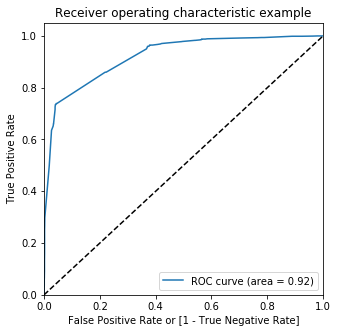

In [168]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

### Finding Optimal Cutoff Point

In [169]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     1   0.997181         3575          1    1    1    1    1    1    1    1   
1     1   0.872457         6887          1    1    1    1    1    1    1    1   
2     0   0.315438          834          0    1    1    1    1    0    0    0   
3     0   0.300170         8221          0    1    1    1    1    0    0    0   
4     1   0.981421         7021          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    1    1    1  
1    1    1    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375286  1.000000  0.000000
0.1   0.1  0.744175  0.964699  0.611700
0.2   0.2  0.750343  0.964699  0.621572
0.3   0.3  0.751942  0.950091  0.632907
0.4   0.4  0.874372  0.735240  0.957952
0.5   0.5  0.874829  0.734023  0.959415
0.6   0.6  0.873458  0.729154  0.960146
0.7   0.7  0.873001  0.727937  0.960146
0.8   0.8  0.851074  0.659160  0.966362
0.9   0.9  0.733897  0.295192  0.997441


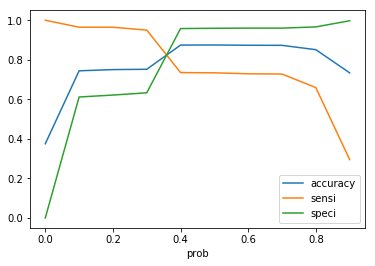

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [172]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     1   0.997181         3575          1    1    1    1    1    1    1    1   
1     1   0.872457         6887          1    1    1    1    1    1    1    1   
2     0   0.315438          834          0    1    1    1    1    0    0    0   
3     0   0.300170         8221          0    1    1    1    1    0    0    0   
4     1   0.981421         7021          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    1    1    1                1  
1    1    1    0                1  
2    0    0    0                1  
3    0    0    0                1  
4    1    1    1                1

In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.7519415258108726

In [174]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[1731, 1004],
       [  82, 1561]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
TP / float(TP+FN)

0.9500912964090079

In [177]:
TN / float(TN+FP)

0.6329067641681901

In [178]:
print(FP/ float(TN+FP))

0.36709323583180986


In [179]:
print (TP / float(TP+FP))

0.6085769980506822


In [181]:
print (TN / float(TN+ FN))

0.9547710976282405
